In [13]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%run 101-data_preprocessing.py

In [3]:
# load the model from disk
modelXGB_001 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.01.pickle.dat'), 'rb'))
modelXGB_002 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.02.pickle.dat'), 'rb'))
modelXGB_003 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.03.pickle.dat'), 'rb'))
modelXGB_004 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.04.pickle.dat'), 'rb'))
modelXGB_005 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.05.pickle.dat'), 'rb'))
modelXGB_006 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.06.pickle.dat'), 'rb'))
modelXGB_007 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.07.pickle.dat'), 'rb'))
modelXGB_008 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.08.pickle.dat'), 'rb'))
modelXGB_009 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.09.pickle.dat'), 'rb'))
modelXGB_01 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.1.pickle.dat'), 'rb'))
modelXGB_02 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.2.pickle.dat'), 'rb'))
modelXGB_03 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.3.pickle.dat'), 'rb'))
modelXGB_04 = pickle.load(open(os.path.join(path_y_t2, 't2-xgboostModel-0.4.pickle.dat'), 'rb'))

In [4]:
modelXGB_list = [modelXGB_001, modelXGB_002, modelXGB_003, modelXGB_004, modelXGB_005, 
                 modelXGB_006, modelXGB_007, modelXGB_008, modelXGB_009,
                 modelXGB_01, modelXGB_02, modelXGB_03, modelXGB_04, modelXGB_05, 
                 modelXGB_06, modelXGB_07, modelXGB_08, modelXGB_09, modelXGB_1]
learning_rate_list = [0.01, 0.02, 0.03, 0.04, 0.05, 
                      0.06, 0.07, 0.08, 0.09, 
                      0.1, 0.2, 0.3, 0.4, 0.5, 
                      0.6, 0.7, 0.8, 0.9, 1.0]

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

mse_list = []
r2_list = []

for modelXGB in modelXGB_list:
    # compute the mse and r-squared
    y_pred = modelXGB.predict(X_valid)
    mse_list.append(mean_squared_error(y_valid_t2, y_pred))
    r2_list.append(r2_score(y_valid_t2, y_pred))

In [6]:
# find the index of the max mse
print(np.argmin(mse_list), max(mse_list), sep=': ')
print(np.argmax(r2_list), max(r2_list), sep=': ')

8: 6.12744027341781
8: 0.19616086843260216


Text(0, 0.5, 'r-squared')

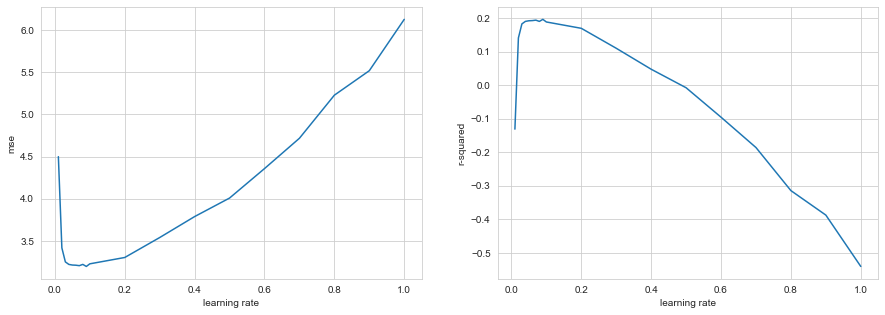

In [7]:
# plot the graph of mse and r-squared
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(learning_rate_list, mse_list)
# for i, txt in enumerate(mse_list):
#     ax1.annotate(np.around(txt, 2), (learning_rate_list[i], mse_list[i]))
ax1.set_xlabel('learning rate')
ax1.set_ylabel('mse')

ax2.plot(learning_rate_list, r2_list)
# for i, txt in enumerate(r2_list):
#     ax2.annotate(np.around(txt, 2), (learning_rate_list[i], r2_list[i]))
ax2.set_xlabel('learning rate')
ax2.set_ylabel('r-squared')

In [15]:
# hence, model with learning rate of 0.08 is performance the best
y_pred_test = modelXGB_008.predict(X_test)
df_test = pd.DataFrame(y_pred_test)

# save the prediction
df_test.to_csv(os.path.join(path_y_t2, 'Y_test.csv'), index=False)